In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
import sys
import json
from numpy import linalg as LA

import tensorflow as tf

import getpass
ui = getpass.getuser()
if ui == 'laura':
    p = '/home/laura'
elif ui == 'lauradriscoll':
    p = '/Users/lauradriscoll/Documents'

net = 'transfer_learn'
PATH_YANGNET = os.path.join(p,'code/multitask-nets',net) 

sys.path.insert(0, PATH_YANGNET)
from task import generate_trials, rule_name, rule_index_map, rules_dict
from network import Model, get_perf, FixedPoint_Model
import tools
from analysis import clustering, standard_analysis, variance
import numpy.random as npr
from tools_lnd import var_ex_X_task, get_model_params, gen_trial_set,gen_trials_from_model_dir,remove_spines
from tools_lnd import make_FP_axs,interp_h_tasks_w_context,get_filename,interp3d

In [2]:
figpath = os.path.join(p,'code','overleaf','multitask-nets','v4_figs','paper_figs','fig5','post_transfer_fp')
if not os.path.exists(figpath):
    os.makedirs(figpath)

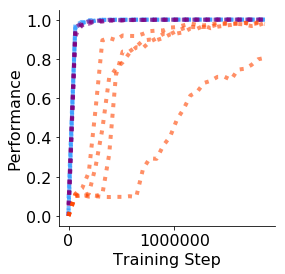

In [3]:
fig = plt.figure(figsize=(3, 3)) #7,2
plt.rcParams.update({'font.size': 16})
# ax_pre = fig.add_axes([0,0,.4,1])
# ax_post = fig.add_axes([.55,0,.4,1])
ax_post = fig.add_axes([0,0,1,1])
n_steps = 30

rnn_type = 'LeakyRNN'
activation = 'softplus'
w_init = 'diag'
n_rnn = str(256)
l2w = -6
l2h = -6
l1w = 0
l1h = 0
seed = str(1)
lr = -7
data_folder = 'data/rnn/multitask/transfer_learn/final/'
post_train = 'delayanti'

c_set = {'pro_small':'orangered','mem_anti_motifs':'dodgerblue','all':'purple'}
labels = {'pro_small':'DelayPro, MemoryPro',
          'mem_anti_motifs':'DelayAnti, MemoryPro',
          'all':'All tasks except MemoryAnti'}


for ruleset in ['mem_anti_motifs','all','pro_small']:
    task_set = rules_dict[ruleset]
    if ruleset=='all':
        task_set = ['fdgo','reactgo','delaygo','fdanti','reactanti','delayanti','delaydm1','delaydm2',
                    'contextdelaydm1','contextdelaydm2','multidelaydm','dmsgo','dmsnogo','dmcgo','dmcnogo']
        task_set.pop(5)
    rule_trains_str = '_'.join(task_set)
    n_tasks = str(len(task_set))

    net_name = 'lr'+"{:.1f}".format(-lr)+'l2_w'+"{:.1f}".format(-l2w)+'_h'+"{:.1f}".format(-l2h)+'_'+rule_trains_str
    
    for seed_ind in range(4):
        seed=str(seed_ind)
        m = os.path.join(p,data_folder,rnn_type,activation,w_init,ruleset,n_tasks+'_tasks',n_rnn+'_n_rnn',net_name,'post_train_'+post_train,seed)
        pre_m = os.path.join(p,'data/rnn/multitask/stepnet/final',ruleset,rnn_type,activation,w_init,
                         n_tasks+'_tasks',n_rnn+'_n_rnn',net_name,seed)

#         plt.sca(ax_pre)
#         with open(os.path.join(pre_m,'log.json'), 'r') as f:
#             log_pre = json.load(f)
#         for rule in ['delaygo',]:
#             plt.plot(log_pre['trials'][:n_steps],(log_pre['perf_'+rule][:n_steps]),'-',c = c_set[ruleset],
#                      alpha = .6,linewidth = 4,label = 'single task network')
#         ax_pre.set_xlabel('Training Step')
#         ax_pre.set_ylabel('Performance')
#         ax_pre.spines['top'].set_visible(False)
#         ax_pre.spines['right'].set_visible(False)

        plt.sca(ax_post)
        with open(os.path.join(m,'log.json'), 'r') as f:
            log_post = json.load(f)
        rule = 'delayanti'
        plt.plot(log_post['trials'][:n_steps],(log_post['perf_'+rule][:n_steps]),':',c = c_set[ruleset],
                 alpha = .6,linewidth = 4,label = 'single task network')
        ax_post.set_xlabel('Training Step')
        ax_post.set_ylabel('Performance')
        ax_post.spines['top'].set_visible(False)
        ax_post.spines['right'].set_visible(False)

figname = 'cost_transfer_pre_post'
plt.savefig(os.path.join(figpath,figname+'.pdf'),bbox_inches = 'tight')
plt.savefig(os.path.join(figpath,figname+'.png'),bbox_inches = 'tight')

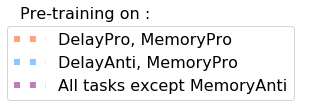

In [4]:
fig = plt.figure(figsize=(.1, .1)) #7,2
plt.rcParams.update({'font.size': 16})
ax = plt.subplot(111)

for ruleset in ['pro_small','mem_anti_motifs','all']:
    plt.plot(0,0,':',c =c_set[ruleset],alpha = .5,linewidth = 6,label = labels[ruleset])

plt.text(-5.5,.1,'Pre-training on : ')
plt.legend(bbox_to_anchor=(0, .6, 1, 1))
remove_spines(ax)
ax.set_yticks([])
ax.set_xticks([])

figname = 'perf legend'
plt.savefig(os.path.join(figpath,figname+'.pdf'),bbox_inches = 'tight')
plt.savefig(os.path.join(figpath,figname+'.png'),bbox_inches = 'tight')

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel_input_delayanti:0' shape=(1, 256) dtype=float32_ref>
Instructions for updating:
Use `tf.global_variables_initializer` instead.
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/transfer_learn/final/LeakyRNN/softplus/diag/mem_anti_motifs/2_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_delaygo_fdanti/post_train_delayanti/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/transfer_learn/final/LeakyRNN/softplus/diag/mem_anti_motifs/2_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_delaygo_fdanti/post_train_delayanti/0/model.ckpt
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel_input_delayanti:0' shape=(1, 256) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/transfer_learn/final/LeakyRNN/softplus/diag/mem_anti_motifs/2_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_dela

/usr/local/Caskroom/miniconda/base/envs/tensorflow/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


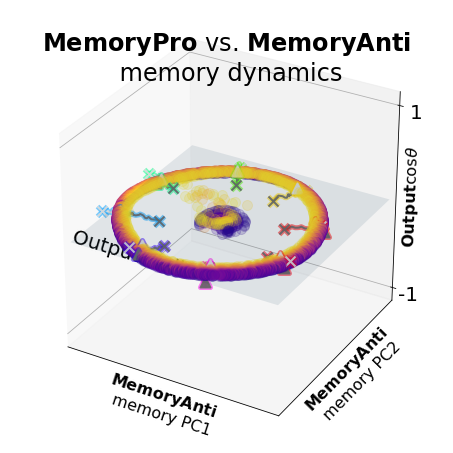

go1
go1
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel_input_delayanti:0' shape=(1, 256) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/transfer_learn/final/LeakyRNN/softplus/diag/mem_anti_motifs/2_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_delaygo_fdanti/post_train_delayanti/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/transfer_learn/final/LeakyRNN/softplus/diag/mem_anti_motifs/2_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_delaygo_fdanti/post_train_delayanti/0/model.ckpt
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel_input_delayanti:0' shape=(1, 256) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/transfer_learn/final/LeakyRNN/softplus/diag/mem_anti_motifs/2_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_delaygo_fdanti/post_train_delayanti/0/model.ckpt
Model restored from f

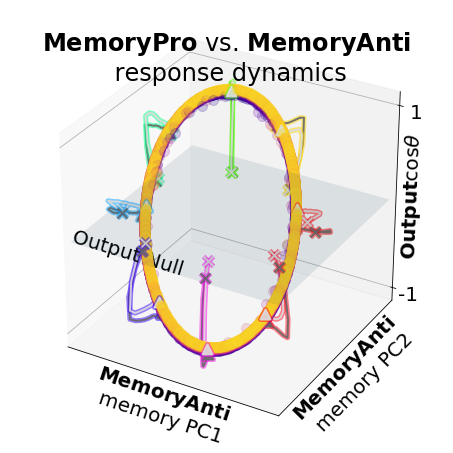

stim1
stim1
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel_input_delayanti:0' shape=(1, 256) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/transfer_learn/final/LeakyRNN/softplus/diag/mem_anti_motifs/2_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_delaygo_fdanti/post_train_delayanti/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/transfer_learn/final/LeakyRNN/softplus/diag/mem_anti_motifs/2_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_delaygo_fdanti/post_train_delayanti/0/model.ckpt
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel_input_delayanti:0' shape=(1, 256) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/transfer_learn/final/LeakyRNN/softplus/diag/mem_anti_motifs/2_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_delaygo_fdanti/post_train_delayanti/0/model.ckpt
Model restored fr

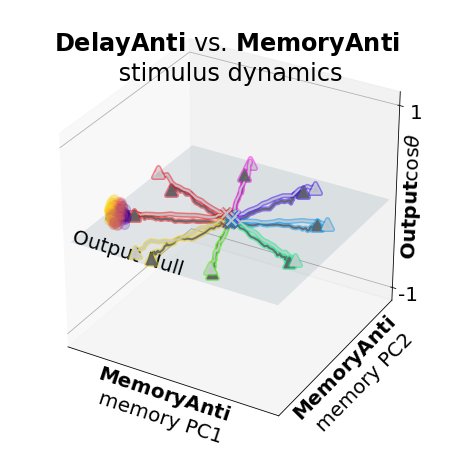

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel_input_delayanti:0' shape=(1, 256) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/transfer_learn/final/LeakyRNN/softplus/diag/mem_anti_motifs/2_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_delaygo_fdanti/post_train_delayanti/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/transfer_learn/final/LeakyRNN/softplus/diag/mem_anti_motifs/2_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_delaygo_fdanti/post_train_delayanti/0/model.ckpt
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel_input_delayanti:0' shape=(1, 256) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/transfer_learn/final/LeakyRNN/softplus/diag/mem_anti_motifs/2_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_delaygo_fdanti/post_train_delayanti/0/model.ckpt
Model restored from file: /Us

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel_input_delayanti:0' shape=(1, 256) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/transfer_learn/final/LeakyRNN/softplus/diag/mem_anti_motifs/2_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_delaygo_fdanti/post_train_delayanti/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/transfer_learn/final/LeakyRNN/softplus/diag/mem_anti_motifs/2_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_delaygo_fdanti/post_train_delayanti/0/model.ckpt
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel_input_delayanti:0' shape=(1, 256) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/transfer_learn/final/LeakyRNN/softplus/diag/mem_anti_motifs/2_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_delaygo_fdanti/post_train_delayanti/0/model.ckpt
Model restored from file: /Us

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel_input_delayanti:0' shape=(1, 256) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/transfer_learn/final/LeakyRNN/softplus/diag/mem_anti_motifs/2_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_delaygo_fdanti/post_train_delayanti/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/transfer_learn/final/LeakyRNN/softplus/diag/mem_anti_motifs/2_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_delaygo_fdanti/post_train_delayanti/0/model.ckpt
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel_input_delayanti:0' shape=(1, 256) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/transfer_learn/final/LeakyRNN/softplus/diag/mem_anti_motifs/2_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_delaygo_fdanti/post_train_delayanti/0/model.ckpt
Model restored from file: /Us

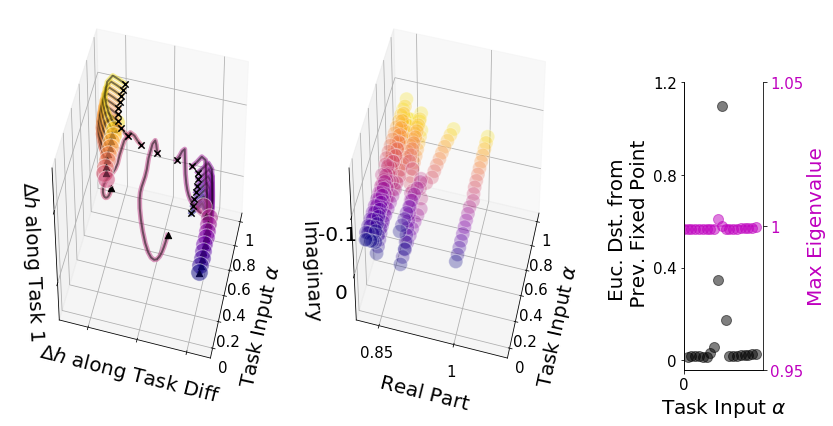

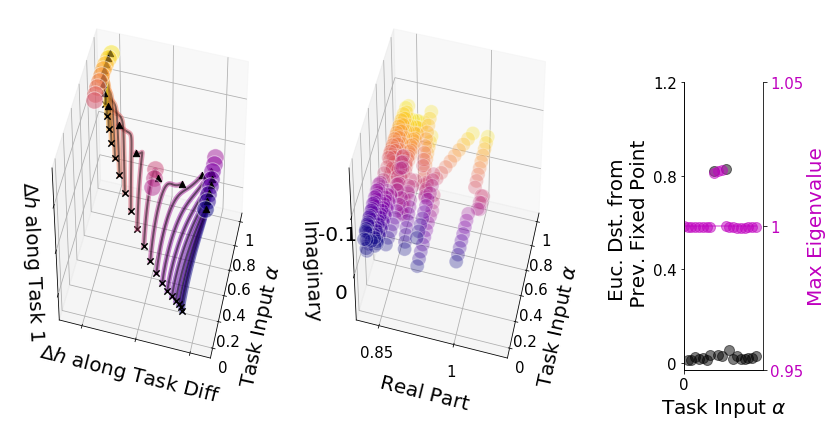

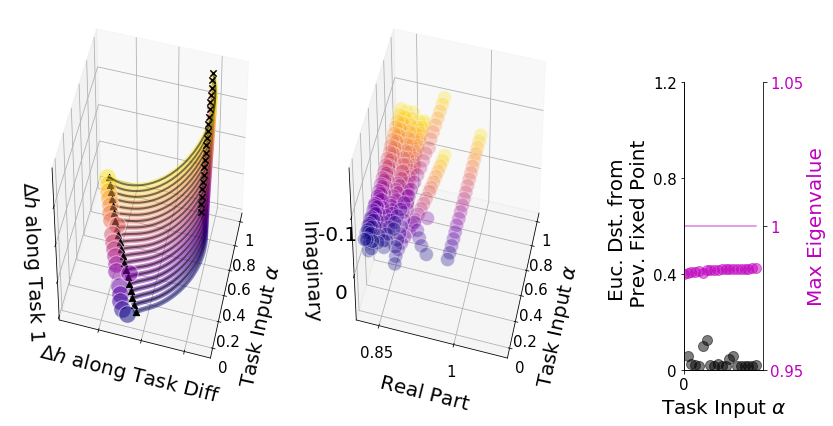

In [5]:
ruleset = 'mem_anti_motifs'

task_set = rules_dict[ruleset]
if ruleset=='all':
    task_set = ['fdgo','reactgo','delaygo','fdanti','reactanti','delayanti','delaydm1','delaydm2',
                'contextdelaydm1','contextdelaydm2','multidelaydm','dmsgo','dmsnogo','dmcgo','dmcnogo']
    task_set.pop(5)
rule_trains_str = '_'.join(task_set)
n_tasks = str(len(task_set))

net_name = 'lr'+"{:.1f}".format(-lr)+'l2_w'+"{:.1f}".format(-l2w)+'_h'+"{:.1f}".format(-l2h)+'_'+rule_trains_str
seed = '0'
m = os.path.join(p,data_folder,rnn_type,activation,w_init,ruleset,n_tasks+'_tasks',n_rnn+'_n_rnn',net_name,'post_train_'+post_train,seed)

rule_set = ['delaygo','delayanti']
epoch_set = ['delay1','delay1']
t_set = [0,0]
ri_axs = 1
epoch = epoch_set[ri_axs]
rule = rule_set[ri_axs]
trial = gen_trials_from_model_dir(m,rule,noise_on = False)
filename,_ = get_filename(trial,epoch,0)
f = os.path.join(m,'tf_fixed_pts_all_init',rule,filename+'.npz')
D_use = make_FP_axs(f, m, rule, epoch, axs = 'pca_h', clust = 'False')
w_in, b_in, w_out, b_out = get_model_params(m)
D_use[:,2] = w_out[:,1]

interp3d(m,D_use,rule_set,epoch_set,t_set,script_name = 'interp_tasks_small_init_mov_transfer',tol_q = 1e-6,
         interp = True,cmap_grad = plt.get_cmap('plasma'),cmap_discrete = ['dimgray','gainsboro'],q_thresh = .000001,
         n_skip_interps=1, rule_axs = ri_axs, lil_axes =False, plot_unstable = True,
         plot_zero_plane = True,color_stim = False,fig_size = 6, fontsize = 20, figpath = figpath,
         ruleset = ruleset)

rule_set = ['delaygo','delayanti']
epoch_set = ['go1','go1']
t_set = [0,0]

interp3d(m,D_use,rule_set,epoch_set,t_set,script_name = 'interp_tasks_small_init_mov_transfer',tol_q = 1e-6,
         interp = True,cmap_grad = plt.get_cmap('plasma'),cmap_discrete = ['dimgray','gainsboro'],q_thresh = .000001,
         n_skip_interps=1, rule_axs = ri_axs, lil_axes =False, plot_unstable = True,
         plot_zero_plane = True,color_stim = False,fig_size = 6, fontsize = 20, figpath = figpath,
         ruleset = ruleset)

rule_set = ['fdanti','delayanti']
epoch_set = ['stim1','stim1']
t_set = [0,0]

interp3d(m,D_use,rule_set,epoch_set,t_set,script_name = 'interp_tasks_small_init_mov_transfer',tol_q = 1e-6,
         interp = True,cmap_grad = plt.get_cmap('plasma'),cmap_discrete = ['dimgray','gainsboro'],q_thresh = .000001,
         n_skip_interps=1, rule_axs = ri_axs, lil_axes =False, plot_unstable = True,
         plot_zero_plane = True,color_stim = True,fig_size = 6, fontsize = 20, figpath = figpath,
         ruleset = ruleset)

#eig
ri_set = [2,5]
epoch_list = ['go1','go1']
trial_set = gen_trial_set(m,ri_set)
interp_h_tasks_w_context(m,ri_set,trial_set,epoch_list,step_file = 'interp_tasks_small_init_mov_transfer',
                         figpath = figpath,ruleset = ruleset)
ri_set = [2,5]
epoch_list = ['delay1','delay1']
trial_set = gen_trial_set(m,ri_set)
interp_h_tasks_w_context(m,ri_set,trial_set,epoch_list,step_file = 'interp_tasks_small_init_mov_transfer',
                         figpath = figpath,ruleset = ruleset)
ri_set = [3,5]
epoch_list = ['stim1','stim1']
trial_set = gen_trial_set(m,ri_set)
interp_h_tasks_w_context(m,ri_set,trial_set,epoch_list,step_file = 'interp_tasks_small_init_mov_transfer',
                         figpath = figpath,ruleset = ruleset)




0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel_input_delayanti:0' shape=(1, 256) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/transfer_learn/final/LeakyRNN/softplus/diag/pro_small/2_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_fdgo_delaygo/post_train_delayanti/1/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/transfer_learn/final/LeakyRNN/softplus/diag/pro_small/2_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_fdgo_delaygo/post_train_delayanti/1/model.ckpt
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel_input_delayanti:0' shape=(1, 256) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/transfer_learn/final/LeakyRNN/softplus/diag/pro_small/2_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_fdgo_delaygo/post_train_delayanti/1/model.ckpt
Model restored from file: /Users/lauradriscoll/Docume

IOError: [Errno 2] No such file or directory: '/Users/lauradriscoll/Documents/data/rnn/multitask/transfer_learn/final/LeakyRNN/softplus/diag/pro_small/2_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_fdgo_delaygo/post_train_delayanti/1/interp_tasks_small_init_mov_transfer/delaygo_delayanti/tol_q_e_7.0/delaygo_delayanti_delay1_delay1_x0.0_x0.0_step_19.npz'

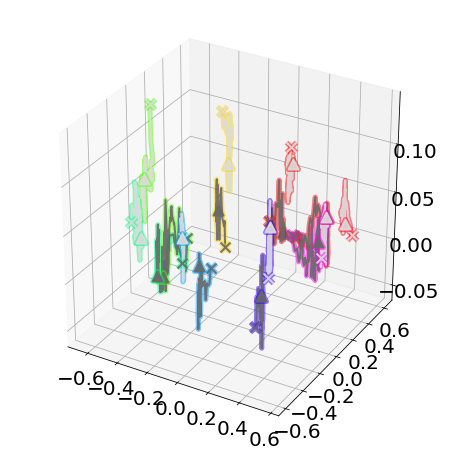

In [6]:
ruleset = 'pro_small'

task_set = rules_dict[ruleset]
if ruleset=='all':
    task_set = ['fdgo','reactgo','delaygo','fdanti','reactanti','delayanti','delaydm1','delaydm2',
                'contextdelaydm1','contextdelaydm2','multidelaydm','dmsgo','dmsnogo','dmcgo','dmcnogo']
    task_set.pop(5)
rule_trains_str = '_'.join(task_set)
n_tasks = str(len(task_set))

net_name = 'lr'+"{:.1f}".format(-lr)+'l2_w'+"{:.1f}".format(-l2w)+'_h'+"{:.1f}".format(-l2h)+'_'+rule_trains_str
seed = '1'
m = os.path.join(p,data_folder,rnn_type,activation,w_init,ruleset,n_tasks+'_tasks',n_rnn+'_n_rnn',net_name,'post_train_'+post_train,seed)

rule_set = ['delaygo','delayanti']
epoch_set = ['delay1','delay1']
t_set = [0,0]
ri_axs = 1
epoch = epoch_set[ri_axs]
rule = rule_set[ri_axs]
trial = gen_trials_from_model_dir(m,rule,noise_on = False)
filename,_ = get_filename(trial,epoch,0)
f = os.path.join(m,'tf_fixed_pts_all_init',rule,filename+'.npz')
D_use = make_FP_axs(f, m, rule, epoch, axs = 'pca_h', clust = 'False')
w_in, b_in, w_out, b_out = get_model_params(m)
D_use[:,2] = w_out[:,1]

interp3d(m,D_use,rule_set,epoch_set,t_set,script_name = 'interp_tasks_small_init_mov_transfer',tol_q = 1e-7,
         interp = True,cmap_grad = plt.get_cmap('plasma'),cmap_discrete = ['dimgray','gainsboro'],q_thresh = .000001,
            n_skip_interps=1, rule_axs = ri_axs, lil_axes =False, plot_unstable = True,
            plot_zero_plane = True,color_stim = False,fig_size = 6, fontsize = 20, figpath = figpath,
         ruleset = ruleset)
plt.show()

rule_set = ['delaygo','delayanti']
epoch_set = ['go1','go1']
t_set = [0,0]

interp3d(m,D_use,rule_set,epoch_set,t_set,script_name = 'interp_tasks_small_init_mov_transfer',tol_q = 1e-7,
         interp = True,cmap_grad = plt.get_cmap('plasma'),cmap_discrete = ['dimgray','gainsboro'],q_thresh = .000001,
            n_skip_interps=1, rule_axs = ri_axs, lil_axes =False, plot_unstable = True,
            plot_zero_plane = True,color_stim = False,fig_size = 6, fontsize = 20, figpath = figpath,
         ruleset = ruleset)
plt.show()

rule_set = ['fdgo','delayanti']
epoch_set = ['stim1','stim1']
t_set = [0,0]

interp3d(m,D_use,rule_set,epoch_set,t_set,script_name = 'interp_tasks_small_init_mov_transfer',tol_q = 1e-7,
         interp = True,cmap_grad = plt.get_cmap('plasma'),cmap_discrete = ['dimgray','gainsboro'],q_thresh = .000001,
            n_skip_interps=1, rule_axs = ri_axs, lil_axes =False, plot_unstable = True,
            plot_zero_plane = True,color_stim = False,fig_size = 6, fontsize = 20, figpath = figpath,
         ruleset = ruleset)
plt.show()

#eig
ri_set = [0,5]
epoch_list = ['stim1','stim1']
trial_set = gen_trial_set(m,ri_set)
interp_h_tasks_w_context(m,ri_set,trial_set,epoch_list,step_file = 'interp_tasks_small_init_mov_transfer',
                         q_thresh = 1e-7,figpath = figpath,ruleset = ruleset)
ri_set = [2,5]
epoch_list = ['delay1','delay1']
trial_set = gen_trial_set(m,ri_set)
interp_h_tasks_w_context(m,ri_set,trial_set,epoch_list,step_file = 'interp_tasks_small_init_mov_transfer',
                         q_thresh = 1e-7,figpath = figpath,ruleset = ruleset)
ri_set = [2,5]
epoch_list = ['go1','go1']
trial_set = gen_trial_set(m,ri_set)
interp_h_tasks_w_context(m,ri_set,trial_set,epoch_list,step_file = 'interp_tasks_small_init_mov_transfer',
                         q_thresh = 1e-7,figpath = figpath,ruleset = ruleset)


In [ ]:
ruleset = 'mem_anti_motifs'

task_set = rules_dict[ruleset]
if ruleset=='all':
    task_set = ['fdgo','reactgo','delaygo','fdanti','reactanti','delayanti','delaydm1','delaydm2',
                'contextdelaydm1','contextdelaydm2','multidelaydm','dmsgo','dmsnogo','dmcgo','dmcnogo']
    task_set.pop(5)
rule_trains_str = '_'.join(task_set)
n_tasks = str(len(task_set))

net_name = 'lr'+"{:.1f}".format(-lr)+'l2_w'+"{:.1f}".format(-l2w)+'_h'+"{:.1f}".format(-l2h)+'_'+rule_trains_str

fig = plt.figure(figsize=(4,4),tight_layout=True,facecolor='white')
ax = plt.subplot(1,1,1)
for seed_ind in range(5):
    seed=str(seed_ind)
    m = os.path.join(p,data_folder,rnn_type,activation,w_init,ruleset,n_tasks+'_tasks',n_rnn+'_n_rnn',net_name,'post_train_'+post_train,seed)
        
    ri_set = [5,3]
    rule_set = [rules_dict['all'][ri_set[0]],rules_dict['all'][ri_set[1]]]
    epoch_set = ['stim1','stim1']
    
    if seed=='0':
        plot_legend = True
    else:
        plot_legend = False
        
    var_ex_X_task(m, rule_set, epoch_set,plot_legend = plot_legend, n_components = 20)

figname = 'var_ex_'+ruleset+'_'+'_'.join(rule_set)+'_'.join(epoch_set)

fig_fldr = os.path.join(figpath,'var',ruleset)
if not os.path.exists(fig_fldr):
    os.makedirs(fig_fldr)
        
plt.savefig(os.path.join(fig_fldr,figname+'.pdf'),bbox_inches = 'tight')
plt.savefig(os.path.join(fig_fldr,figname+'.png'),bbox_inches = 'tight')
plt.show()

fig = plt.figure(figsize=(4,4),tight_layout=True,facecolor='white')
ax = plt.subplot(1,1,1)
for seed_ind in range(5):
    seed=str(seed_ind)
    m = os.path.join(p,data_folder,rnn_type,activation,w_init,ruleset,n_tasks+'_tasks',n_rnn+'_n_rnn',net_name,'post_train_'+post_train,seed)
      
    ri_set = [5,2]
    rule_set = [rules_dict['all'][ri_set[0]],rules_dict['all'][ri_set[1]]]
    epoch_set = ['delay1','delay1']
    
    if seed=='0':
        plot_legend = True
    else:
        plot_legend = False
    
    var_ex_X_task(m, rule_set, epoch_set,plot_legend = plot_legend, n_components = 20)
    
figname = 'var_ex_'+ruleset+'_'+'_'.join(rule_set)+'_'.join(epoch_set)

fig_fldr = os.path.join(figpath,'var',ruleset)
if not os.path.exists(fig_fldr):
    os.makedirs(fig_fldr)
        
plt.savefig(os.path.join(fig_fldr,figname+'.pdf'),bbox_inches = 'tight')
plt.savefig(os.path.join(fig_fldr,figname+'.png'),bbox_inches = 'tight')
plt.show()

fig = plt.figure(figsize=(4,4),tight_layout=True,facecolor='white')
ax = plt.subplot(1,1,1)
for seed_ind in range(5):
    seed=str(seed_ind)
    m = os.path.join(p,data_folder,rnn_type,activation,w_init,ruleset,n_tasks+'_tasks',n_rnn+'_n_rnn',net_name,'post_train_'+post_train,seed)
      
    ri_set = [5,2]
    rule_set = [rules_dict['all'][ri_set[0]],rules_dict['all'][ri_set[1]]]
    epoch_set = ['go1','go1']
    
    if seed=='0':
        plot_legend = True
    else:
        plot_legend = False
    
    var_ex_X_task(m, rule_set, epoch_set,plot_legend = plot_legend, n_components = 20)
    
figname = 'var_ex_'+ruleset+'_'+'_'.join(rule_set)+'_'.join(epoch_set)

fig_fldr = os.path.join(figpath,'var',ruleset)
if not os.path.exists(fig_fldr):
    os.makedirs(fig_fldr)
        
plt.savefig(os.path.join(fig_fldr,figname+'.pdf'),bbox_inches = 'tight')
plt.savefig(os.path.join(fig_fldr,figname+'.png'),bbox_inches = 'tight')
plt.show()

In [ ]:
ruleset = 'pro_small'

task_set = rules_dict[ruleset]
if ruleset=='all':
    task_set = ['fdgo','reactgo','delaygo','fdanti','reactanti','delayanti','delaydm1','delaydm2',
                'contextdelaydm1','contextdelaydm2','multidelaydm','dmsgo','dmsnogo','dmcgo','dmcnogo']
    task_set.pop(5)
rule_trains_str = '_'.join(task_set)
n_tasks = str(len(task_set))

net_name = 'lr'+"{:.1f}".format(-lr)+'l2_w'+"{:.1f}".format(-l2w)+'_h'+"{:.1f}".format(-l2h)+'_'+rule_trains_str

fig = plt.figure(figsize=(4,4),tight_layout=True,facecolor='white')
ax = plt.subplot(1,1,1)
for seed_ind in range(4):
    seed=str(seed_ind)
    m = os.path.join(p,data_folder,rnn_type,activation,w_init,ruleset,n_tasks+'_tasks',n_rnn+'_n_rnn',net_name,'post_train_'+post_train,seed)
        
    ri_set = [5,0]
    rule_set = [rules_dict['all'][ri_set[0]],rules_dict['all'][ri_set[1]]]
    epoch_set = ['stim1','stim1']
    
    if seed=='0':
        plot_legend = True
    else:
        plot_legend = False
        
    var_ex_X_task(m, rule_set, epoch_set,plot_legend = plot_legend, n_components = 20)

figname = 'var_ex_'+ruleset+'_'+'_'.join(rule_set)+'_'.join(epoch_set)

fig_fldr = os.path.join(figpath,'var',ruleset)
if not os.path.exists(fig_fldr):
    os.makedirs(fig_fldr)
        
plt.savefig(os.path.join(fig_fldr,figname+'.pdf'),bbox_inches = 'tight')
plt.savefig(os.path.join(fig_fldr,figname+'.png'),bbox_inches = 'tight')
plt.show()

fig = plt.figure(figsize=(4,4),tight_layout=True,facecolor='white')
ax = plt.subplot(1,1,1)
for seed_ind in range(4):
    seed=str(seed_ind)
    m = os.path.join(p,data_folder,rnn_type,activation,w_init,ruleset,n_tasks+'_tasks',n_rnn+'_n_rnn',net_name,'post_train_'+post_train,seed)
      
    ri_set = [5,2]
    rule_set = [rules_dict['all'][ri_set[0]],rules_dict['all'][ri_set[1]]]
    epoch_set = ['delay1','delay1']
    
    if seed=='0':
        plot_legend = True
    else:
        plot_legend = False
    
    var_ex_X_task(m, rule_set, epoch_set,plot_legend = plot_legend, n_components = 20)
    
figname = 'var_ex_'+ruleset+'_'+'_'.join(rule_set)+'_'.join(epoch_set)

fig_fldr = os.path.join(figpath,'var',ruleset)
if not os.path.exists(fig_fldr):
    os.makedirs(fig_fldr)
        
plt.savefig(os.path.join(fig_fldr,figname+'.pdf'),bbox_inches = 'tight')
plt.savefig(os.path.join(fig_fldr,figname+'.png'),bbox_inches = 'tight')
plt.show()

fig = plt.figure(figsize=(4,4),tight_layout=True,facecolor='white')
ax = plt.subplot(1,1,1)
for seed_ind in range(4):
    seed=str(seed_ind)
    m = os.path.join(p,data_folder,rnn_type,activation,w_init,ruleset,n_tasks+'_tasks',n_rnn+'_n_rnn',net_name,'post_train_'+post_train,seed)
      
    ri_set = [5,2]
    rule_set = [rules_dict['all'][ri_set[0]],rules_dict['all'][ri_set[1]]]
    epoch_set = ['go1','go1']
    
    if seed=='0':
        plot_legend = True
    else:
        plot_legend = False
    
    var_ex_X_task(m, rule_set, epoch_set,plot_legend = plot_legend, n_components = 20)
    
figname = 'var_ex_'+ruleset+'_'+'_'.join(rule_set)+'_'.join(epoch_set)

fig_fldr = os.path.join(figpath,'var',ruleset)
if not os.path.exists(fig_fldr):
    os.makedirs(fig_fldr)
        
plt.savefig(os.path.join(fig_fldr,figname+'.pdf'),bbox_inches = 'tight')
plt.savefig(os.path.join(fig_fldr,figname+'.png'),bbox_inches = 'tight')
plt.show()